# Goal: want to investigate how good neural network can predict the stock price -- Use Apple as an example

Traditionally, people do this by fundamental analysis, technical analysis, statistical analysis etc.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
df = pd.read_csv("/content/gdrive/My Drive/ML_Project/data/AAPL_data.csv")
df['Date']=pd.to_datetime(df['Date'])
df.dropna(inplace=True)
df.set_index('Date',inplace=True)

#take a look at what the data like
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.408971,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.387633,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.359183,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.368074,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.378743,18362400.0


In [0]:
# consider only the closing price each day
df_close=df['Close']

# gonna consider the stock price in the Summer (June 21-Sep 23)
# to elimintate the seasonal effect
# clean the data in summer (1983-2018) going to be used in the analysis
tmp={}
for year in np.linspace(1983,2018,36,dtype=int):
  y=str(year)
  tmp_df=df_close[(y+'-06-21'):(y+'-09-23')]
  tmp[y]=tmp_df.tolist()
tmp=pd.DataFrame.from_dict(tmp,orient='index')
df_close=tmp.dropna(axis='columns')

In [0]:
#take a look at what data after cleaning looks like
df_close.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
1983,0.959821,0.988839,0.957589,0.950893,0.899554,0.837054,0.877232,0.872768,0.879464,0.843750,0.845982,0.834821,0.825893,0.848214,0.828125,0.823661,0.821429,0.792411,0.790179,0.781250,0.736607,0.774554,0.781250,0.770089,0.698661,0.647321,0.607143,0.622768,0.616071,0.613839,0.622768,0.593750,0.604911,0.607143,0.613839,0.611607,0.602679,0.598214,0.613839,0.604911,0.591518,0.598214,0.602679,0.600446,0.569196,0.540179,0.544643,0.551339,0.558036,0.587054,0.665179,0.649554,0.678571,0.703125,0.618304,0.566964,0.546875,0.546875,0.571429,0.564732,0.537946
1984,0.517857,0.511161,0.486607,0.464286,0.450893,0.470982,0.473214,0.457589,0.450893,0.441964,0.448661,0.468750,0.479911,0.473214,0.475446,0.470982,0.459821,0.459821,0.453125,0.453125,0.453125,0.448661,0.475446,0.477679,0.486607,0.484375,0.455357,0.455357,0.446429,0.430804,0.488839,0.522321,0.529018,0.508929,0.531250,0.508929,0.535714,0.515625,0.497768,0.502232,0.491071,0.488839,0.508929,0.500000,0.502232,0.502232,0.497768,0.504464,0.491071,0.482143,0.473214,0.468750,0.468750,0.473214,0.473214,0.470982,0.479911,0.466518,0.491071,0.497768,0.511161
1985,0.287946,0.308036,0.312500,0.323661,0.328125,0.321429,0.323661,0.308036,0.312500,0.314732,0.314732,0.314732,0.321429,0.321429,0.319196,0.316964,0.312500,0.314732,0.308036,0.310268,0.301339,0.294643,0.290179,0.296875,0.296875,0.285714,0.290179,0.283482,0.283482,0.281250,0.274554,0.272321,0.265625,0.270089,0.272321,0.267857,0.272321,0.261161,0.258929,0.261161,0.267857,0.272321,0.272321,0.265625,0.263393,0.270089,0.272321,0.272321,0.265625,0.267857,0.263393,0.265625,0.265625,0.267857,0.272321,0.274554,0.276786,0.287946,0.281250,0.272321,0.272321
1986,0.620536,0.622768,0.640625,0.647321,0.640625,0.640625,0.631696,0.645089,0.671875,0.636161,0.611607,0.618304,0.631696,0.662946,0.647321,0.622768,0.598214,0.575893,0.566964,0.598214,0.618304,0.609375,0.591518,0.607143,0.578125,0.558036,0.544643,0.558036,0.560268,0.562500,0.573661,0.555804,0.566964,0.564732,0.598214,0.611607,0.642857,0.642857,0.638393,0.631696,0.631696,0.647321,0.638393,0.647321,0.649554,0.654018,0.660714,0.674107,0.660714,0.620536,0.620536,0.633929,0.627232,0.620536,0.638393,0.625000,0.582589,0.566964,0.591518,0.622768,0.611607
1987,1.500000,1.473214,1.500000,1.446429,1.446429,1.455357,1.446429,1.428571,1.450893,1.455357,1.401786,1.330357,1.348214,1.357143,1.446429,1.535714,1.571429,1.571429,1.544643,1.491071,1.477679,1.517857,1.491071,1.517857,1.508929,1.495536,1.464286,1.482143,1.473214,1.437500,1.508929,1.544643,1.651786,1.660714,1.723214,1.767857,1.741071,1.750000,1.750000,1.767857,1.741071,1.785714,1.848214,1.892857,1.866071,1.857143,1.857143,1.857143,1.857143,1.928571,1.875000,1.857143,1.830357,1.803571,1.781250,1.883929,1.919643,1.946429,1.892857,1.848214,1.848214


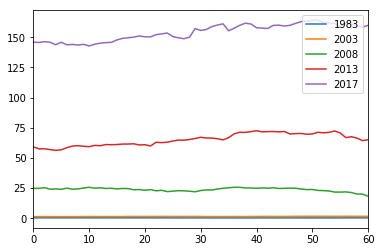

In [0]:
#Have an idea of the stock price in the summer of a year

pd.DataFrame(
    {'1983':df_close.loc['1985',:],
     '2003':df_close.loc['2003',:],
     '2008':df_close.loc['2008',:],
     '2013':df_close.loc['2013',:],
     '2017':df_close.loc['2017',:]
     }).plot()
ax.set(xlabel="Day", ylabel="Stock Price",
       title="Stock Price of Apple in Summer, 2013")
plt.show()

In [0]:
# set up the test train split

#Use 35 years of stock price as train data
train=df_close['1983':'2017']

#Use 1 year of stock price as test data
test=df_close['2017':'2018']

## LSTM for one-to-one structure

look at the 1st day of summer over 1982-2017 and predict the stock price on the 1st day of summer in 2018

In [0]:
X_train=train.iloc[:-1].loc[:,0];X_train_t=X_train[:,None][:,None]
Y_train=train.iloc[1:].loc[:,0];Y_train_t=Y_train[:,None]

X_test=test.iloc[:-1].loc[:,0];X_test_t=X_test[:,None][:,None]
Y_test=test.iloc[1:].loc[:,0];Y_test_t=Y_test[:,None]

In [0]:
from keras.models import Sequential
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, GRU
from keras.layers import Dense

In [0]:
K.clear_session()

early_stop=EarlyStopping(monitor='loss',patience=10,verbose=1)

# LSTM Network w/ 6 units
lstm_unit=6

model=Sequential()
model.add(LSTM(lstm_unit,input_shape=(1,1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_t, Y_train_t,
          epochs=5000, batch_size=1, verbose=1,
          callbacks=[early_stop])

y_pred=model.predict(X_test_t)

Epoch 1/5000
34/34 [==============================] - 1s 22ms/step - loss: 2016.1370
Epoch 2/5000
34/34 [==============================] - 0s 2ms/step - loss: 2013.2196
Epoch 3/5000
34/34 [==============================] - 0s 2ms/step - loss: 2010.5899
Epoch 4/5000
34/34 [==============================] - 0s 2ms/step - loss: 2007.7906
Epoch 5/5000
34/34 [==============================] - 0s 2ms/step - loss: 2005.1916
Epoch 6/5000
34/34 [==============================] - 0s 2ms/step - loss: 2002.4976
Epoch 7/5000
34/34 [==============================] - 0s 2ms/step - loss: 2000.0312
Epoch 8/5000
34/34 [==============================] - 0s 2ms/step - loss: 1997.3972
Epoch 9/5000
34/34 [==============================] - 0s 2ms/step - loss: 1994.7467
Epoch 10/5000
34/34 [==============================] - 0s 2ms/step - loss: 1992.3641
Epoch 11/5000
34/34 [==============================] - 0s 2ms/step - loss: 1989.5145
Epoch 12/5000
34/34 [==============================] - 0s 2ms/step - loss

In [0]:
print('Predicted stock price =',y_pred[0][0])
print('The truth stock price =',Y_test_t[0][0])

Predicted stock price = 83.99686
The truth stock price = 185.46000700000002


- It was found that epoch=100 or 1000 is not enough - loss is decreasing, but still large. And the predicted stock price from that are way too small, just ~$10, far smaller than the truth.

- epoch=5000 with patience =10 give a much bigger predicted stock price, closer to the truth. But still much smaller than the truth.

## LSTM for many-to-many structure

In [0]:
X_train=train.iloc[:-1];X_train=X_train.values
Y_train=train.iloc[1:];Y_train=Y_train.values

X_test=test.iloc[:-1];X_test=X_test.values
Y_test=test.iloc[1:];Y_test=Y_test.values

X_train_t=np.zeros((np.shape(X_train)[0],np.shape(X_train)[1],1))
for yr in range(np.shape(X_train)[0]):
  X_train_t[yr]=X_train[yr].reshape((len(X_train[0]),1))

Y_train_t=np.zeros((np.shape(Y_train)[0],np.shape(Y_train)[1],1))
for yr in range(np.shape(Y_train)[0]):
  Y_train_t[yr]=Y_train[yr].reshape((len(Y_train[0]),1))

X_test_t=np.zeros((np.shape(X_test)[0],np.shape(X_test)[1],1))
for yr in range(np.shape(X_test)[0]):
  X_test_t[yr]=X_test[yr].reshape((len(X_test[0]),1))

Y_test_t=np.zeros((np.shape(Y_test)[0],np.shape(Y_test)[1],1))
for yr in range(np.shape(Y_test)[0]):
  Y_test_t[yr]=Y_test[yr].reshape((len(Y_test[0]),1))

In [0]:
from keras.models import Sequential
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, GRU
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
K.clear_session()

early_stop=EarlyStopping(monitor='loss',patience=10,verbose=1)

# LSTM Network w/ 6 units
lstm_unit=6
stepsize=X_train.shape[1]

model=Sequential()
model.add(LSTM(lstm_unit,input_shape=(stepsize,1),return_sequences=True))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train_t, Y_train_t, epochs=5000,
          batch_size=1, verbose=1, callbacks=[early_stop])

y_pred=model.predict(X_test_t)

Epoch 1/5000
34/34 [==============================] - 2s 49ms/step - loss: 2195.8239
Epoch 2/5000
34/34 [==============================] - 1s 28ms/step - loss: 2192.9377
Epoch 3/5000
34/34 [==============================] - 1s 28ms/step - loss: 2189.5941
Epoch 4/5000
34/34 [==============================] - 1s 27ms/step - loss: 2184.8139
Epoch 5/5000
34/34 [==============================] - 1s 27ms/step - loss: 2181.5243
Epoch 6/5000
34/34 [==============================] - 1s 31ms/step - loss: 2177.2065
Epoch 7/5000
34/34 [==============================] - 1s 28ms/step - loss: 2169.5649
Epoch 8/5000
34/34 [==============================] - 1s 28ms/step - loss: 2166.4276
Epoch 9/5000
34/34 [==============================] - 1s 28ms/step - loss: 2163.7031
Epoch 10/5000
34/34 [==============================] - 1s 26ms/step - loss: 2161.3957
Epoch 11/5000
34/34 [==============================] - 1s 27ms/step - loss: 2158.9614
Epoch 12/5000
34/34 [==============================] - 1s 27ms/

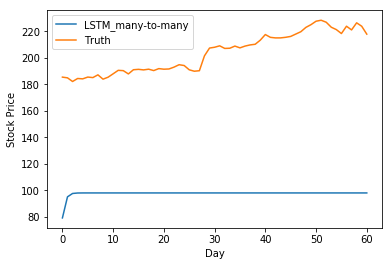

In [0]:
plt.plot(y_pred.flatten(),label='LSTM_many-to-many')
plt.plot(Y_test_t.flatten(),label='Truth')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Try with more nodes (many-to-many)

In [0]:
K.clear_session()

early_stop=EarlyStopping(monitor='loss',patience=10,verbose=1)

# LSTM Network w/ 12 units
lstm_unit=12
stepsize=X_train.shape[1]

model=Sequential()
model.add(LSTM(lstm_unit,input_shape=(stepsize,1),return_sequences=True))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train_t, Y_train_t, epochs=5000,
          batch_size=1, verbose=1, callbacks=[early_stop])

y_pred=model.predict(X_test_t)

Epoch 1/5000
34/34 [==============================] - 2s 46ms/step - loss: 2229.3819
Epoch 2/5000
34/34 [==============================] - 1s 29ms/step - loss: 2205.6870
Epoch 3/5000
34/34 [==============================] - 1s 28ms/step - loss: 2193.1675
Epoch 4/5000
34/34 [==============================] - 1s 28ms/step - loss: 2177.6823
Epoch 5/5000
34/34 [==============================] - 1s 27ms/step - loss: 2170.5830
Epoch 6/5000
34/34 [==============================] - 1s 26ms/step - loss: 2162.5261
Epoch 7/5000
34/34 [==============================] - 1s 26ms/step - loss: 2141.0178
Epoch 8/5000
34/34 [==============================] - 1s 26ms/step - loss: 2119.2605
Epoch 9/5000
34/34 [==============================] - 1s 27ms/step - loss: 2095.1786
Epoch 10/5000
34/34 [==============================] - 1s 26ms/step - loss: 2073.7071
Epoch 11/5000
34/34 [==============================] - 1s 27ms/step - loss: 2053.4973
Epoch 12/5000
34/34 [==============================] - 1s 27ms/

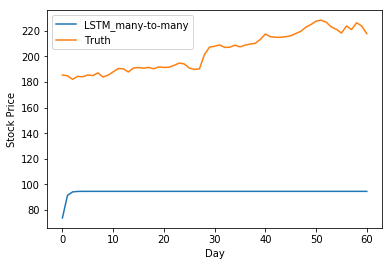

In [0]:
plt.plot(y_pred.flatten(),label='LSTM_many-to-many')
plt.plot(Y_test_t.flatten(),label='Truth')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

doesnt seem improve much

## Many-to-Many Structure with lagged feature 

In [0]:
X_train=train.iloc[:-1];X_train=X_train.values
Y_train=train.iloc[1:];Y_train=Y_train.values

X_test=test.iloc[:-1];X_test=X_test.values
Y_test=test.iloc[1:];Y_test=Y_test.values

same_yr_lag=5

X_train_t=np.zeros((np.shape(X_train)[0],np.shape(X_train)[1]-same_yr_lag,
                    same_yr_lag+1))
for yr in range(np.shape(X_train)[0]):
  for d in range(np.shape(X_train)[1]-same_yr_lag):
    X_train_t[yr][d,:]=X_train[yr,d:(d+same_yr_lag+1)]

Y_train_t=np.zeros((np.shape(Y_train)[0],np.shape(Y_train)[1]-same_yr_lag,
                    1))
for yr in range(np.shape(Y_train)[0]):
  Y_train_t[yr]=(Y_train[yr][same_yr_lag:]).reshape(
      (len(Y_train[0])-same_yr_lag,1))

X_test_t=np.zeros((np.shape(X_test)[0],np.shape(X_test)[1]-same_yr_lag,
                   same_yr_lag+1))
for yr in range(np.shape(X_test)[0]):
  for d in range(np.shape(X_test)[1]-same_yr_lag):
    X_test_t[yr][d,:]=X_test[yr,d:(d+same_yr_lag+1)]

Y_test_t=np.zeros((np.shape(Y_test)[0],np.shape(Y_test)[1]-same_yr_lag,
                   1))
for yr in range(np.shape(Y_test)[0]):
  Y_test_t[yr]=(Y_test[yr][same_yr_lag:]).reshape(
      (len(Y_test[0])-same_yr_lag,1))

In [0]:
K.clear_session()

early_stop=EarlyStopping(monitor='loss',patience=10,verbose=1)

# LSTM Network w/ 6 units
lstm_unit=6
stepsize=X_train.shape[1]

model=Sequential()
model.add(LSTM(lstm_unit,input_shape=(stepsize-same_yr_lag,same_yr_lag+1),
               return_sequences=True))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train_t, Y_train_t, epochs=5000,
          batch_size=1, verbose=1, callbacks=[early_stop])

y_pred=model.predict(X_test_t)

Epoch 1/5000
34/34 [==============================] - 2s 49ms/step - loss: 2276.6298
Epoch 2/5000
34/34 [==============================] - 1s 26ms/step - loss: 2256.3534
Epoch 3/5000
34/34 [==============================] - 1s 26ms/step - loss: 2252.9259
Epoch 4/5000
34/34 [==============================] - 1s 26ms/step - loss: 2250.7970
Epoch 5/5000
34/34 [==============================] - 1s 27ms/step - loss: 2232.7359
Epoch 6/5000
34/34 [==============================] - 1s 28ms/step - loss: 2218.6096
Epoch 7/5000
34/34 [==============================] - 1s 27ms/step - loss: 2181.2674
Epoch 8/5000
34/34 [==============================] - 1s 27ms/step - loss: 2166.0033
Epoch 9/5000
34/34 [==============================] - 1s 25ms/step - loss: 2143.0628
Epoch 10/5000
34/34 [==============================] - 1s 28ms/step - loss: 2118.9461
Epoch 11/5000
34/34 [==============================] - 1s 26ms/step - loss: 2100.4667
Epoch 12/5000
34/34 [==============================] - 1s 27ms/

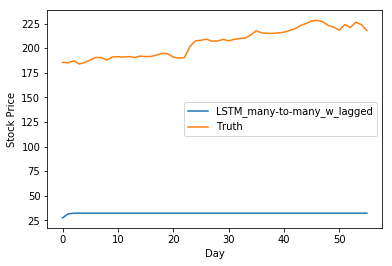

In [0]:
plt.plot(y_pred.flatten(),label='LSTM_many-to-many_w_lagged')
plt.plot(Y_test_t.flatten(),label='Truth')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## LSTM_many-to-one (Many years to one year)

consider only Day 0 here

In [0]:
num_yr=5

# need to inc more data inthe test set
#Use 1 year of stock price as test data
test=df_close[str(2018-num_yr):'2018']

X_train=train.iloc[:-1];X_train=X_train.values
Y_train=train.iloc[num_yr:];Y_train=Y_train.values

X_test=test.iloc[:-1];X_test=X_test.values
Y_test=test.iloc[num_yr:];Y_test=Y_test.values

X_train_t=np.zeros((np.shape(Y_train)[0],num_yr,1))
for yr in range(np.shape(Y_train)[0]):
  X_train_t[yr]=X_train[(num_yr+yr-num_yr):(num_yr+yr-1+1),0].reshape(num_yr,1)

Y_train_t=np.zeros((np.shape(Y_train)[0],1))
for yr in range(np.shape(Y_train)[0]):
  Y_train_t[yr]=Y_train[yr,0]

X_test_t=np.zeros((np.shape(Y_test)[0],num_yr,1))
for yr in range(np.shape(Y_test)[0]):
  X_test_t[yr]=X_test[(num_yr+yr-num_yr):(num_yr+yr-1+1),0].reshape(num_yr,1)

Y_test_t=np.zeros((np.shape(Y_test)[0],1))
for yr in range(np.shape(Y_test)[0]):
  Y_test_t[yr]=Y_test[yr,0]

In [0]:
K.clear_session()

early_stop=EarlyStopping(monitor='loss',patience=10,verbose=1)

# LSTM Network w/ 6 units
lstm_unit=6
stepsize=num_yr

model=Sequential()
model.add(LSTM(lstm_unit,input_shape=(stepsize,1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train_t, Y_train_t, epochs=5000,
          batch_size=1, verbose=1, callbacks=[early_stop])

y_pred=model.predict(X_test_t)

Epoch 1/5000
30/30 [==============================] - 1s 30ms/step - loss: 2343.3519
Epoch 2/5000
30/30 [==============================] - 0s 5ms/step - loss: 2337.1754
Epoch 3/5000
30/30 [==============================] - 0s 5ms/step - loss: 2327.7671
Epoch 4/5000
30/30 [==============================] - 0s 5ms/step - loss: 2318.2139
Epoch 5/5000
30/30 [==============================] - 0s 5ms/step - loss: 2312.9833
Epoch 6/5000
30/30 [==============================] - 0s 5ms/step - loss: 2309.9439
Epoch 7/5000
30/30 [==============================] - 0s 5ms/step - loss: 2307.2586
Epoch 8/5000
30/30 [==============================] - 0s 5ms/step - loss: 2304.9140
Epoch 9/5000
30/30 [==============================] - 0s 5ms/step - loss: 2302.5422
Epoch 10/5000
30/30 [==============================] - 0s 5ms/step - loss: 2300.2478
Epoch 11/5000
30/30 [==============================] - 0s 5ms/step - loss: 2298.1104
Epoch 12/5000
30/30 [==============================] - 0s 5ms/step - loss

In [0]:
print('Predicted stock price =',y_pred[0][0])
print('The truth stock price =',Y_test_t[0][0])

Predicted stock price = 95.12192
The truth stock price = 185.46000700000002


improve a bit compared with previously considering day in a time series.

But still way too small.

consider only Day 10 here

In [0]:
num_yr=5

# need to inc more data inthe test set
#Use 1 year of stock price as test data
test=df_close[str(2018-num_yr):'2018']

X_train=train.iloc[:-1];X_train=X_train.values
Y_train=train.iloc[num_yr:];Y_train=Y_train.values

X_test=test.iloc[:-1];X_test=X_test.values
Y_test=test.iloc[num_yr:];Y_test=Y_test.values

X_train_t=np.zeros((np.shape(Y_train)[0],num_yr,1))
for yr in range(np.shape(Y_train)[0]):
  X_train_t[yr]=X_train[(num_yr+yr-num_yr):(num_yr+yr-1+1),10].reshape(num_yr,1)

Y_train_t=np.zeros((np.shape(Y_train)[0],1))
for yr in range(np.shape(Y_train)[0]):
  Y_train_t[yr]=Y_train[yr,10]

X_test_t=np.zeros((np.shape(Y_test)[0],num_yr,1))
for yr in range(np.shape(Y_test)[0]):
  X_test_t[yr]=X_test[(num_yr+yr-num_yr):(num_yr+yr-1+1),10].reshape(num_yr,1)

Y_test_t=np.zeros((np.shape(Y_test)[0],1))
for yr in range(np.shape(Y_test)[0]):
  Y_test_t[yr]=Y_test[yr,10]

In [0]:
K.clear_session()

early_stop=EarlyStopping(monitor='loss',patience=10,verbose=1)

# LSTM Network w/ 6 units
lstm_unit=6
stepsize=num_yr

model=Sequential()
model.add(LSTM(lstm_unit,input_shape=(stepsize,1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train_t, Y_train_t, epochs=5000,
          batch_size=1, verbose=1, callbacks=[early_stop])

y_pred=model.predict(X_test_t)

Epoch 1/5000
30/30 [==============================] - 1s 30ms/step - loss: 2384.2718
Epoch 2/5000
30/30 [==============================] - 0s 5ms/step - loss: 2382.0632
Epoch 3/5000
30/30 [==============================] - 0s 5ms/step - loss: 2379.8289
Epoch 4/5000
30/30 [==============================] - 0s 5ms/step - loss: 2377.4798
Epoch 5/5000
30/30 [==============================] - 0s 5ms/step - loss: 2374.3671
Epoch 6/5000
30/30 [==============================] - 0s 5ms/step - loss: 2367.2119
Epoch 7/5000
30/30 [==============================] - 0s 5ms/step - loss: 2356.3580
Epoch 8/5000
30/30 [==============================] - 0s 5ms/step - loss: 2352.1433
Epoch 9/5000
30/30 [==============================] - 0s 5ms/step - loss: 2350.7413
Epoch 10/5000
30/30 [==============================] - 0s 5ms/step - loss: 2349.5709
Epoch 11/5000
30/30 [==============================] - 0s 5ms/step - loss: 2348.4949
Epoch 12/5000
30/30 [==============================] - 0s 5ms/step - loss

In [0]:
print('Predicted stock price =',y_pred[0][0])
print('The truth stock price =',Y_test_t[0][0])

Predicted stock price = 96.10272
The truth stock price = 187.970001


Similarly small.